In [1]:
#installing qiskit libraries with visualisation
!pip install qiskit[visualization]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [2]:
#using shell to import the qiskit textbook module
%%shell
git clone https://github.com/qiskit-community/qiskit-textbook.git
cd qiskit-textbook
pip install ./qiskit-textbook-src

Cloning into 'qiskit-textbook'...
remote: Enumerating objects: 15071, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 15071 (delta 27), reused 49 (delta 23), pack-reused 15012
Receiving objects: 100% (15071/15071), 158.92 MiB | 23.30 MiB/s, done.
Resolving deltas: 100% (9992/9992), done.
Updating files: 100% (814/814), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./qiskit-textbook-src
  Preparing metadata (setup.py) ... done
  Created wheel for qiskit-textbook: filename=qiskit_textbook-0.1.0-py3-none-any.whl size=17557 sha256=6a5bca85bf6f65d6331808105fd2b3814be4ac926c4200f355f41de0f9d56337
  Stored in directory: /root/.cache/pip/wheels/6f/b7/48/e776ca9fcc50b3e9757a4f85ba4ae072499a60973ce9aebda4
Successfully built qiskit-textbook


In [3]:
#importing libraries
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit_textbook.widgets import binary_widget

1. Using Widgets

In [4]:
#Using widgets to represent any number from 0 to 127
binary_widget(nbits=7)

HTML(value='<pre>Binary    Decimal\n 0000000 = 0</pre>')

2. Using Quantum circuits

In [5]:
#Basic representation of 127 in decimal or 1000000 in binary
qc_encode = QuantumCircuit(8)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [6]:
#measuring each bit
qc_encode.measure_all()
qc_encode.draw()

░ ┌─┐                     
   q_0: ──────░─┤M├─────────────────────
              ░ └╥┘┌─┐                  
   q_1: ──────░──╫─┤M├──────────────────
              ░  ║ └╥┘┌─┐               
   q_2: ──────░──╫──╫─┤M├───────────────
              ░  ║  ║ └╥┘┌─┐            
   q_3: ──────░──╫──╫──╫─┤M├────────────
              ░  ║  ║  ║ └╥┘┌─┐         
   q_4: ──────░──╫──╫──╫──╫─┤M├─────────
              ░  ║  ║  ║  ║ └╥┘┌─┐      
   q_5: ──────░──╫──╫──╫──╫──╫─┤M├──────
              ░  ║  ║  ║  ║  ║ └╥┘┌─┐   
   q_6: ──────░──╫──╫──╫──╫──╫──╫─┤M├───
        ┌───┐ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
   q_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├
        └───┘ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 8/═════════╩══╩══╩══╩══╩══╩══╩══╩═
                 0  1  2  3  4  5  6  7

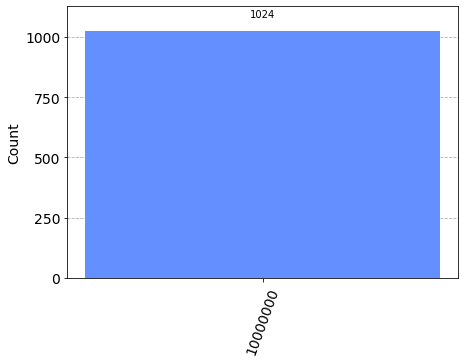

In [7]:
#Plotting on graph
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_encode).result()
counts = result.get_counts()
plot_histogram(counts)